<a href="https://colab.research.google.com/github/chhayayadav/MM1-Statistical-Computing/blob/main/Assignment6_ChhayaYadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For A MM1 Model,
Write a program to simulate a) a Poisson arrival process and exponential serving time; b) calculate each of the probability distributions given in Chapter 7; c) compare with your values as n,t->infinity



In [ ]:
# Let Pn be the probability of n customers in the system.

# Arrival occurs at the rate of λ ( λ is poisson process).

# Service times are exponentially distributed with rate parameter μ.

# A single server serves one customer at single moment on FCFS basis.

# Suppose the system is in state n. 
# Then, (λ+μ)Pn = λPn−1 + μPn+1

# (λ+μ)Pn: rate of an arrival or departure to Pn
# λPn−1: rate of an arrival to Pn−1 
# μPn+1: rate of a departure from Pn+1

In [4]:

import random as rnd
import numpy.random as rnp
import argparse
import pandas as pd
import numpy as np
import queue
import copy
import matplotlib.pyplot as plt

Input time for simulation (Hours): 45
Input Job Arrival Rate (/Hour): 67
Input Job Service Rate (/Hour): 89
3600
[55, 13, 81, 77, 32, 106, 18, 5, 1, 54, 38, 32, 63, 103, 31, 4, 15, 14, 32, 8, 6, 24, 28, 51, 16, 13, 120, 83, 77, 23, 33, 48, 26, 60, 1, 8, 57, 118, 31, 9, 62, 45, 5, 36, 8, 87, 53, 39, 8, 15, 20, 53, 29, 1, 87, 89, 47, 65, 8, 4, 133, 9, 21, 13, 12, 13, 21, 93, 64, 133, 8, 5, 27, 5, 15, 34, 24, 79, 8, 50, 8, 22, 37, 15, 38, 110, 2, 23, 17, 2, 38, 86, 8, 25, 11, 2, 4, 4, 25, 89, 53, 93, 5, 4, 3, 67, 208, 59, 29, 66, 12, 7, 47, 77, 35, 158, 24, 15, 31, 33, 51, 81, 63, 60, 26, 11, 82, 7, 24, 54, 18, 20, 127, 51, 14, 7, 28, 14, 14, 7, 67, 45, 21, 29, 52, 86, 34, 29, 18, 13, 17, 16, 59, 9, 16, 72, 204, 3, 20, 149, 67, 19, 22, 42, 5, 23, 12, 27, 209, 14, 53, 65, 20, 83, 17, 46, 50, 19, 2, 37, 35, 65, 36, 85, 78, 5, 18, 16, 4, 105, 62, 43, 40, 30, 6, 28, 138, 16, 14, 124, 8, 203, 56, 24, 11, 25, 142, 20, 16, 41, 4, 1, 42, 37, 104, 41, 5, 100, 13, 94, 28, 84, 30, 20, 77, 36, 25, 15

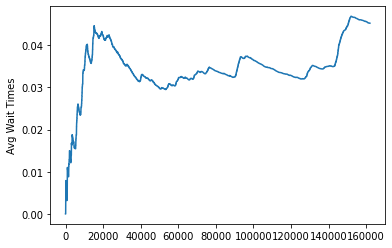

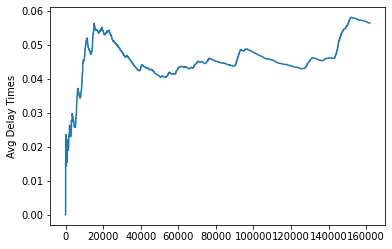

In [10]:
# Input And Initialization
total_time = int(input("Input time for simulation (Hours): "))
IAT_rate = int(input("Input Job Arrival Rate (/Hour): "))
ST_rate = int(input("Input Job Service Rate (/Hour): "))
rho = IAT_rate/ST_rate

qu = queue.Queue()
curr_process = None
IAT,ST,AT,wait_time,list_wait,list_delay=([] for i in range(6))
# Server is not busy
server_busy = False

num_processes = int(np.random.poisson(IAT_rate)* total_time)
num_processes_served = 0
print(num_processes)

# INTER ARRIVAL TIME
for i in range(num_processes):
    temp = np.random.exponential(1/IAT_rate)*60*60
   
    if i==0:
        IAT.append(0)
    else:
        IAT.append(int(temp - temp%1))

# Service Times (ST)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

#copyING  ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation M/M/1 Queue (i is the current time)

for i in range(total_time*60*60):
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True


    sum_wait = 0
    sum_delay = 0

    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]

    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))
        list_delay.append(sum_delay/(num_processes_served*60*60))
print(ST_copy)

# PLOTTING RESULT
plt.plot([i+1 for i in range(total_time*60*60)], list_wait)
plt.ylabel("Avg Wait Times")
plt.show()

plt.plot([i+1 for i in range(total_time*60*60)], list_delay)
plt.ylabel("Avg Delay Times")
plt.show()